#**Projeto de Processamento de Linguagem Natural: Avaliação de Produtos**



Esse projeto tem como objetivo construir um sistema que coleta avaliações de produtos e utiliza diferentes abordagens de aprendizado de máquina (como SVM com Bag of Words, SVM com embeddings e BERT) para classificar o sentimento das avaliações.

**Aluno: Paulo Henrique Azevedo de Moura**

Coleta de Dados: https://www.kaggle.com/datasets/mrmars1010/iphone-customer-reviews-nlp


#Começar importando as bibliotecas abaixo para manipulação e análise de dados. Utilizamos bibliotecas para visualização e criação de gráficos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#Leitura do arquivo .csv através da biblioteca pandas e e armazena os dados em um DataFrame chamado df. Seleciona as primeiras 3000 linhas do DataFrame

In [14]:
df = pd.read_csv('/content/iphone.csv')
print(df.shape)
df = df.head(3000)
print(df.shape)

(3062, 11)
(3000, 11)


#Filtra o DataFrame para incluir apenas as linhas onde o valor na coluna ratingScore é maior que 0.

In [27]:
df[df['ratingScore'] > 0]

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
2995,B09G9D8KRQ,India,11-11-2023,True,1,I phone 13 stopped working within a month.,My phone stopped working within a month. It wa...,https://www.amazon.in/gp/customer-reviews/R1A0...,Reviewed in India on 11 November 2023,Colour: StarlightSize: 128 GB,B09G9D8KRQ
2996,B09G9D8KRQ,India,15-05-2024,True,1,Charging problam,Charg karne me problam aa rahi he .usb cable s...,https://www.amazon.in/gp/customer-reviews/RTUD...,Reviewed in India on 15 May 2024,Colour: StarlightSize: 128 GB,B09G9D8KRQ
2997,B09G9D8KRQ,India,09-10-2023,True,4,Quality,"Okay so talking about the phone, before the de...",https://www.amazon.in/gp/customer-reviews/ROAN...,Reviewed in India on 9 October 2023,Colour: StarlightSize: 128 GB,B09G9D8KRQ
2998,B09G9D8KRQ,India,12-04-2024,True,4,Good phones battery issue,Battery issue,https://www.amazon.in/gp/customer-reviews/R2N6...,Reviewed in India on 12 April 2024,Colour: StarlightSize: 128 GB,B09G9D8KRQ


In [16]:
df['reviewDescription'].values[0]

"Every thing is good about iPhones, there's nothing compared to it's speed and ios but i was disappointed because there's no charger for it even though Indian judiciary told them to provide , still they haven't made any progress regarding charger. Why should we spend 62k and more than that for iPhones because of it's brand and Acessories comfort size and Features right if that's not there what's point of buying an iPhone.Thank you🙏"

Criar um Histograma da coluna ratingScore do dataframe

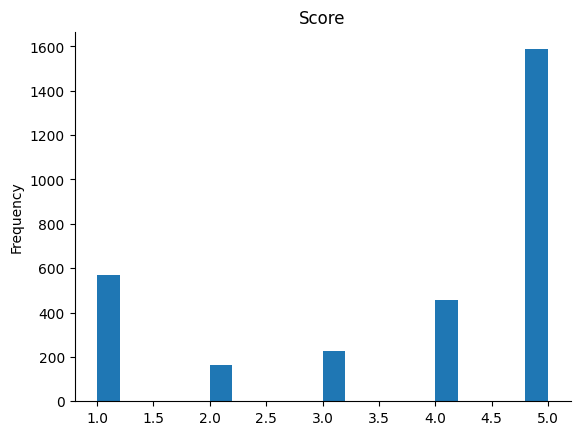

In [34]:
df['ratingScore'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

Obter uma visão geral rápida e útil do conjunto de dados, ajudando a identificar a estrutura dos dados e a presença de valores ausentes.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3000 non-null   object
 1   country            3000 non-null   object
 2   date               3000 non-null   object
 3   isVerified         3000 non-null   bool  
 4   ratingScore        3000 non-null   int64 
 5   reviewTitle        3000 non-null   object
 6   reviewDescription  2916 non-null   object
 7   reviewUrl          2984 non-null   object
 8   reviewedIn         3000 non-null   object
 9   variant            3000 non-null   object
 10  variantAsin        3000 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 237.4+ KB


 Quantidade de dados disponíveis para análise

In [35]:
print(df.shape)

(3000, 11)


Frequência de cada pontuação e a identificar padrões nas avaliações.

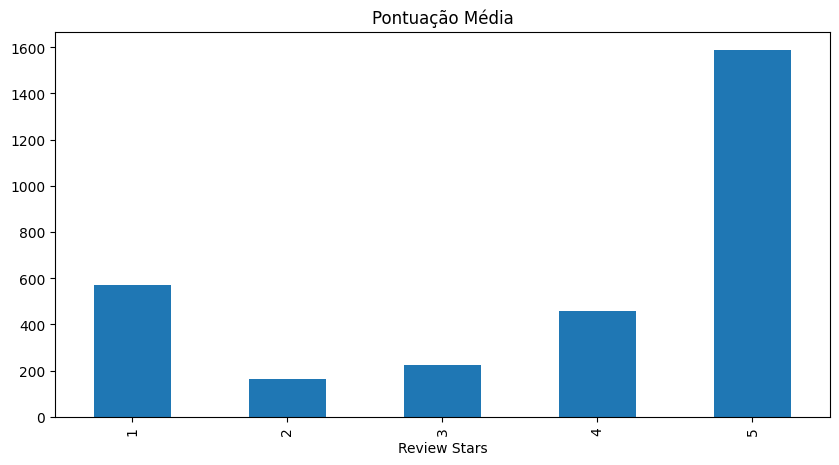

In [20]:
ax = df['ratingScore'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Pontuação Média',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [36]:
example = df['reviewDescription'][5]
print(example)

5 star 👍


In [37]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['5', 'star', '👍']

Identificar e marcar as partes do discurso de cada palavra em uma descrição de revisão.

In [38]:
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('5', 'CD'), ('star', 'NN'), ('👍', 'NN')]

 Identificar e extrair entidades nomeadas do texto, como nomes de pessoas, lugares e organizações

In [39]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S 5/CD star/NN 👍/NN)


In [47]:
sentimento_map = {
    1: 'uma',
    2: 'duas',
    3: 'tres',
    4: 'quatro',
    5: 'cinco'
}

# Substituindo os valores numéricos por texto na coluna 'sentimento'
df['ratingScore'] = df['ratingScore'].replace(sentimento_map)

In [49]:
df.ratingScore.head()

,ratingScore
0,quatro
1,cinco
2,quatro
3,cinco
4,cinco


In [52]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df.ratingScore)

In [54]:
bag_of_words = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [55]:
bag_of_words

,cinco,duas,quatro,tres,uma
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2995,0,0,0,0,1
2996,0,0,0,0,1
2997,0,0,1,0,0
2998,0,0,1,0,0


In [56]:
bag_of_words.shape

(3000, 5)

Separando variáveis de Treinamento e Teste

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, df.ratingScore)

In [61]:
print("Tipo de x_treino:", type(x_treino))
print("Tipo de y_treino:", type(y_treino))

Tipo de x_treino: <class 'pandas.core.frame.DataFrame'>
Tipo de y_treino: <class 'pandas.core.series.Series'>


In [99]:
svm_bow = LinearSVC(random_state=42)
svm_bow.fit(x_treino, y_treino)

LinearSVC(random_state=42)

3. Treinamento de Modelos de Classificação
Vamos treinar três tipos de modelos para classificar as avaliações em sentimentos (positivo, neutro, negativo).

3.1 SVM + Bag of Words (BoW)
Bag of Words é uma técnica simples que transforma o texto em um vetor de contagem de palavras. Vamos usar o CountVectorizer do scikit-learn para isso.

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import re


# Carregar dados
# X são os textos de avaliação, y são as notas do produto
X = ["ótimo produto", "não gostei", "muito bom", "péssimo", "bom"]
y = [5, 1, 5, 1, 4]

# Define a preprocess function
def preprocess(text):
    """
    This function preprocesses the input text by:
    1. Converting it to lowercase.
    2. Removing any non-alphanumeric characters except spaces.
    """
    text = text.lower() # Coloque o texto em minúsculas
    text = re.sub(r"[^a-záàâãéèêíïóôõöúçñ ]", "", text) # Remova pontuação e caracteres especiais, mantendo espaços
    return text

# Pré-processamento
X = [preprocess(text) for text in X]

# Dividir em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, df['ratingScore'], random_state=42)

# Vetorização BoW
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Verifique os tipos
print("Tipo de x_treino:", type(x_treino))  # Deve ser csr_matrix
print("Tipo de y_treino:", type(y_treino))  # Deve ser pandas Series ou array NumPy

# Treinar o modelo SVM
svm_bow = SVC(kernel='linear')
svm_bow.fit(X_train_bow, y_train)

# Fazendo predições
y_pred_bow = svm_bow.predict(x_teste)
y_true = y_teste_numeric
y_teste_str = [sentimento_map.get(pred, pred) for pred in y_teste]
precision = precision_score(y_true, y_pred_bow, zero_division=1, average='weighted')

# Define a reverse mapping to convert string labels back to numbers
reverse_sentimento_map = {v: k for k, v in sentimento_map.items()}

# Apply the reverse mapping to y_teste
y_teste_numeric = y_teste.map(reverse_sentimento_map).fillna(-1).astype(int)

#dict1 = classification_report(y_teste, y_pred_bow, output_dict=True)
y_pred_bow_str = [sentimento_map.get(pred, pred) for pred in y_pred_bow]

# Avaliando o modelo
print("Resultados com Bag of Word:")
print(classification_report(y_teste_str, y_pred_bow_str))
print("Acurácia:", accuracy_score(y_teste_str, y_pred_bow_str))

#dict1 = classification_report(y_teste, y_pred_bow_str, output_dict=True)
dict1 = classification_report(y_teste_str, y_pred_bow_str, output_dict=True)

accu_svm_bow = dict1['accuracy']
fs_svm_bow = dict1['weighted avg']['f1-score']


Tipo de x_treino: <class 'pandas.core.frame.DataFrame'>
Tipo de y_treino: <class 'pandas.core.series.Series'>
Resultados com Bag of Word:
              precision    recall  f1-score   support

       cinco       0.62      1.00      0.76       425
        duas       0.00      0.00      0.00        39
      quatro       0.00      0.00      0.00        99
        tres       0.00      0.00      0.00        62
         uma       0.00      0.00      0.00       125

    accuracy                           0.57       750
   macro avg       0.12      0.20      0.15       750
weighted avg       0.35      0.57      0.43       750

Acurácia: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


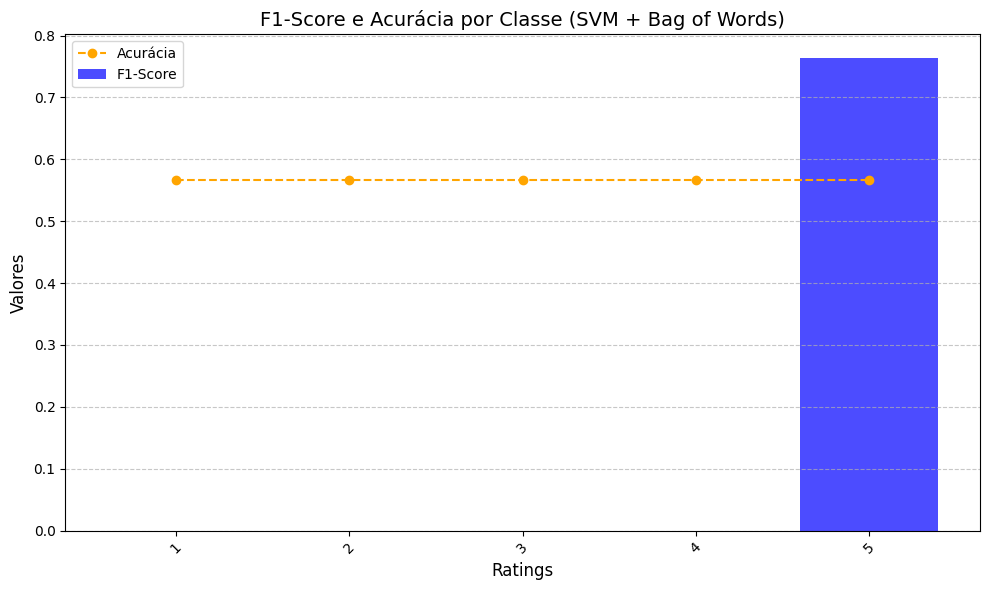

In [106]:
# Obter o relatório de classificação como dicionário
report_bow = classification_report(y_teste, y_pred_bow, output_dict=True)

# Converter o relatório para um DataFrame

report_df = pd.DataFrame(report_bow).transpose()

# Separar métricas por classe (ignorando 'accuracy', 'macro avg' e 'weighted avg')
classes = report_df.index[:-3]  # Pega apenas os nomes das classes
f1_scores = report_df.loc[classes, 'f1-score']
accuracies = [accuracy_score(y_teste, y_pred_bow)] * len(classes)

# Criar o gráfico de F1 e Acurácia
plt.figure(figsize=(10, 6))

# Gráfico F1
plt.bar(classes, f1_scores, alpha=0.7, label="F1-Score", color="blue")

# Gráfico de Acurácia (como linha para comparação)
plt.plot(classes, accuracies, label="Acurácia", color="orange", marker='o', linestyle='--')

# Configurações do gráfico
plt.title("F1-Score e Acurácia por Classe (SVM + Bag of Words)", fontsize=14)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

**3.2 SVM + Embeddings**

Para melhorar a qualidade da representação textual, podemos utilizar embeddings de palavras. Aqui, vamos usar Word2Vec ou GloVe, que são técnicas de embeddings. Para simplificação, usaremos o spaCy com embeddings prontos.

In [105]:
import spacy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Carregar modelo de linguagem do spacy
!python -m spacy download pt_core_news_lg

nlp = spacy.load("pt_core_news_lg")

def get_embeddings(text):
    doc = nlp(text)
    return doc.vector

# Carregar dados (exemplo fictício)
X = ["ótimo produto", "não gostei", "muito bom", "péssimo", "bom"]
y = [5, 1, 5, 1, 4]

# Pré-processamento
X = [preprocess(text) for text in X]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gerar embeddings
X_train_embeddings = [get_embeddings(text) for text in X_train]
X_test_embeddings = [get_embeddings(text) for text in X_test]

# Treinar o modelo SVM com embeddings
svm = SVC(kernel='linear')
svm.fit(X_train_embeddings, y_train)

# Avaliar o modelo
y_pred = svm.predict(X_test_embeddings)
print(f'Acurácia do SVM + Embeddings: {accuracy_score(y_test, y_pred)}')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 3.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Acurácia do SVM + Embeddings: 0.0


3.3 BERT
Para o BERT, podemos usar a biblioteca transformers da Hugging Face. BERT tem pré-processamentos e modelos treinados que podem ser usados diretamente.

**4. In-Context Learning com LLMs**

Utilizar in-context learning significa fornecer um modelo de linguagem como o GPT-4 para fazer inferência em um contexto sem precisar de treinamento adicional. Vamos usar a API OpenAI para isso.

